In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Lasso_regression import Lasso_Regression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#%matplotlib inline
plt.style.use('fivethirtyeight')

This python file contains algorithem for Lasso regression


### Data Ingestions

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns = housing.feature_names)
df_target = pd.DataFrame(housing.target, columns = housing.target_names)
df_final = pd.concat([df,df_target],axis = 1)
df_final.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### EDA

In [3]:
df_final.describe()
df_final.shape

(20640, 9)

#### Check if any nulls inthe data

In [4]:
df_final.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

#### Model Training

In [5]:
from sklearn.preprocessing import StandardScaler
X1 = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]

### Stantardising the data

In [6]:
# Stantardisation of the Data
s_scale = StandardScaler()
X = s_scale.fit_transform(X1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

In [8]:
# Hyperparams initialziations 
lr = 0.0001
max_iterations = 10
lasso_pen = 0.1
model_Lasso = Lasso_Regression(lr,max_iterations,lasso_pen)

Initailizing the Lasso Regression Class


### Fitting the Lasso Regression Model

In [9]:
model_Lasso.fit(X_train,y_train)

Udpating the Weights and bias now
Udpating the Weights and bias now
Udpating the Weights and bias now
Udpating the Weights and bias now
Udpating the Weights and bias now
Udpating the Weights and bias now
Udpating the Weights and bias now
Udpating the Weights and bias now
Udpating the Weights and bias now
Udpating the Weights and bias now
The Function is fit with the weights [ 1.60272660e-03  2.18182204e-04  3.59117034e-04 -9.85968970e-05
 -3.72420545e-05 -3.49263927e-05 -2.84882803e-04 -1.48251451e-04] and bias 0.00412955188973557 with iterations of 10


In [10]:
Predicted_Output =  model_Lasso.predict(X_test)

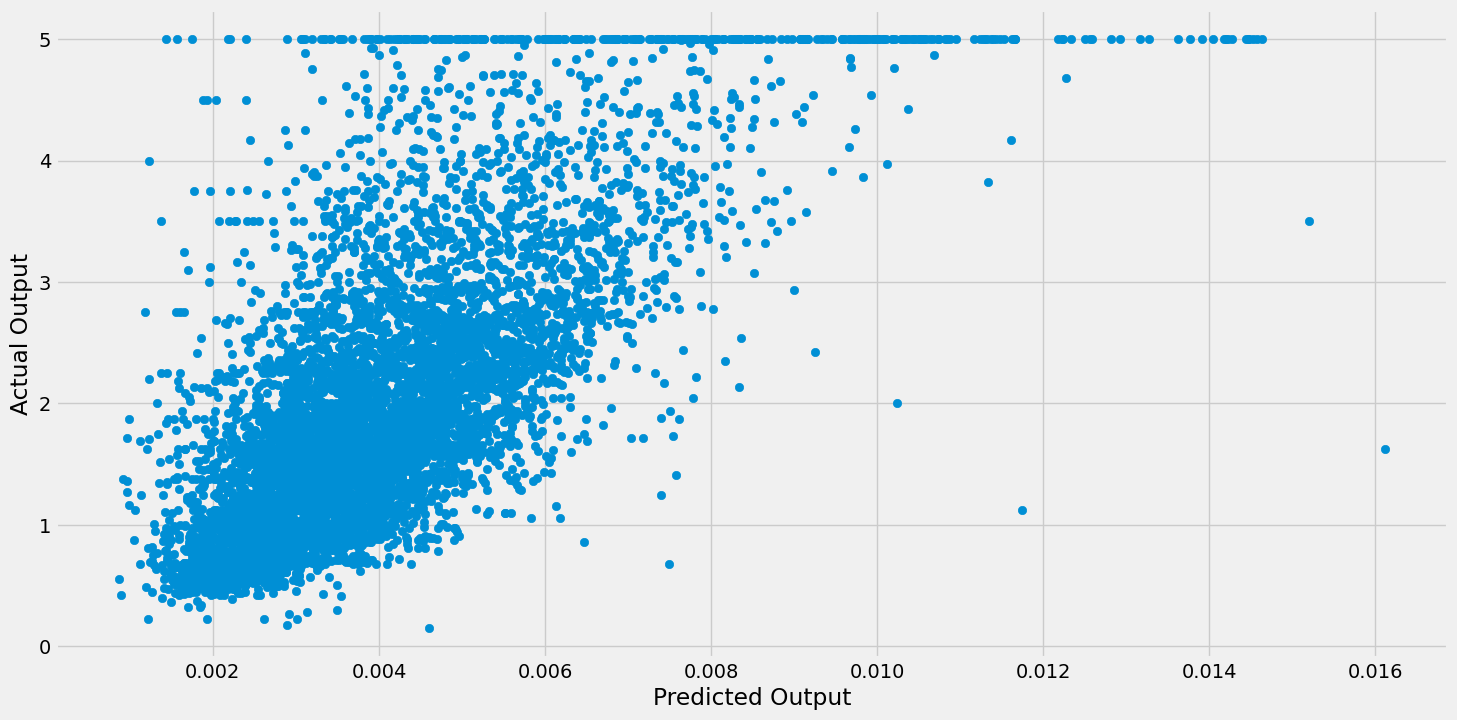

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(Predicted_Output,y_test)
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.show()

### Checking the sk-learn lasso regression Model 

In [19]:
from sklearn import linear_model

In [21]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)


Lasso(alpha=0.1)

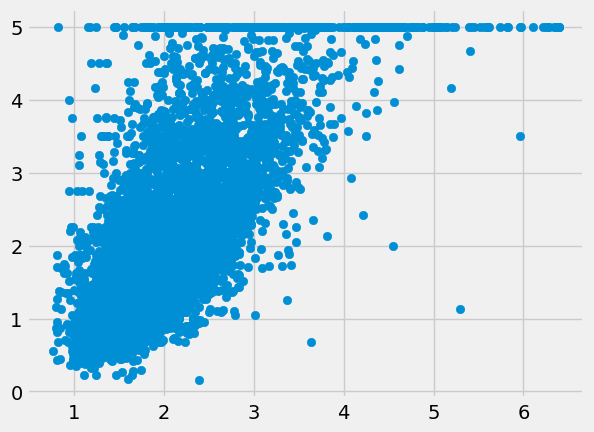

In [22]:
Ypred_test = reg.predict(X_test)
plt.scatter(Ypred_test,y_test)


In [23]:
reg.coef_

array([ 0.70472826,  0.10464912, -0.        ,  0.        , -0.        ,
       -0.        , -0.00883159, -0.        ])

In [24]:
from sklearn.metrics import *

In [29]:
mean_absolute_error(y_test,Ypred_test)
mean_absolute_percentage_error(y_test,Ypred_test)
r2_score(y_test,Ypred_test)
r2_score(y_test,Predicted_Output)

-3.2081630210799794